<a href="https://colab.research.google.com/github/Bhargavvv412/EDA-Feature-Engineering/blob/main/Global_Tech_Gadget_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Global_Tech_Gadget_Consumption.csv')

In [105]:
df.head()

,Country,Year,Smartphone Sales (Millions),Laptop Shipments (Millions),Gaming Console Adoption (%),Smartwatch Penetration (%),Average Consumer Spending on Gadgets ($),E-Waste Generated (Metric Tons),5G Penetration Rate (%)
0,USA,2015,111.37,123.63,12.05,14.49,311.21,939.89,54.64
1,USA,2016,224.65,65.27,12.92,9.88,250.46,1361.42,53.61
2,USA,2017,102.12,26.75,19.63,17.35,2404.22,872.52,29.94
3,USA,2018,148.10,129.28,26.44,12.45,1883.37,1241.41,75.88
4,USA,2019,83.93,97.81,20.84,6.18,777.42,1939.39,76.26


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   110 non-null    object 
 1   Year                                      110 non-null    int64  
 2   Smartphone Sales (Millions)               110 non-null    float64
 3   Laptop Shipments (Millions)               110 non-null    float64
 4   Gaming Console Adoption (%)               110 non-null    float64
 5   Smartwatch Penetration (%)                110 non-null    float64
 6   Average Consumer Spending on Gadgets ($)  110 non-null    float64
 7   E-Waste Generated (Metric Tons)           110 non-null    float64
 8   5G Penetration Rate (%)                   110 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 7.9+ KB


In [107]:
df['Country'].unique()

array(['USA', 'China', 'India', 'Germany', 'UK', 'France', 'Japan',
       'South Korea', 'Brazil', 'Canada'], dtype=object)

In [108]:
df['Country'].unique().shape

(10,)

In [109]:
dummy_Country=pd.get_dummies(df['Country'], prefix='Country', drop_first=True).astype(bool)# if we use other enoder we have to set priority

In [110]:
boolean_country=dummy_Country.astype(int)
# boolean_country

In [111]:
df_copy= df.copy()

In [112]:
df_copy=pd.concat([df, boolean_country], axis=1)
df_copy.head()

,Country,Year,Smartphone Sales (Millions),Laptop Shipments (Millions),Gaming Console Adoption (%),Smartwatch Penetration (%),Average Consumer Spending on Gadgets ($),E-Waste Generated (Metric Tons),5G Penetration Rate (%),Country_Canada,Country_China,Country_France,Country_Germany,Country_India,Country_Japan,Country_South Korea,Country_UK,Country_USA
0,USA,2015,111.37,123.63,12.05,14.49,311.21,939.89,54.64,0,0,0,0,0,0,0,0,1
1,USA,2016,224.65,65.27,12.92,9.88,250.46,1361.42,53.61,0,0,0,0,0,0,0,0,1
2,USA,2017,102.12,26.75,19.63,17.35,2404.22,872.52,29.94,0,0,0,0,0,0,0,0,1
3,USA,2018,148.10,129.28,26.44,12.45,1883.37,1241.41,75.88,0,0,0,0,0,0,0,0,1
4,USA,2019,83.93,97.81,20.84,6.18,777.42,1939.39,76.26,0,0,0,0,0,0,0,0,1


In [113]:
df_copy.drop(['Country'],axis=1,inplace=True)

<Axes: >

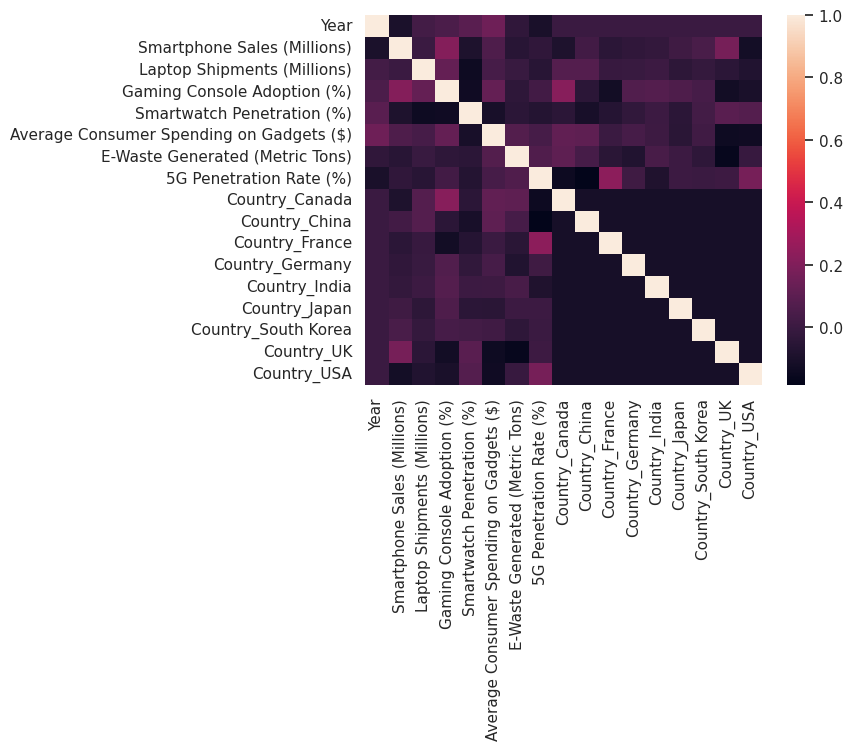

In [114]:
sns.heatmap(df_copy.corr())

In [115]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      110 non-null    int64  
 1   Smartphone Sales (Millions)               110 non-null    float64
 2   Laptop Shipments (Millions)               110 non-null    float64
 3   Gaming Console Adoption (%)               110 non-null    float64
 4   Smartwatch Penetration (%)                110 non-null    float64
 5   Average Consumer Spending on Gadgets ($)  110 non-null    float64
 6   E-Waste Generated (Metric Tons)           110 non-null    float64
 7   5G Penetration Rate (%)                   110 non-null    float64
 8   Country_Canada                            110 non-null    int64  
 9   Country_China                             110 non-null    int64  
 10  Country_France                        

In [116]:
df_copy.describe()

,Year,Smartphone Sales (Millions),Laptop Shipments (Millions),Gaming Console Adoption (%),Smartwatch Penetration (%),Average Consumer Spending on Gadgets ($),E-Waste Generated (Metric Tons),5G Penetration Rate (%),Country_Canada,Country_China,Country_France,Country_Germany,Country_India,Country_Japan,Country_South Korea,Country_UK,Country_USA
count,110.00000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,2020.00000,269.095545,86.082000,21.753545,14.129818,1571.539182,1035.352636,42.816273,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
std,3.17675,128.313552,36.429392,9.748557,6.353190,816.552255,562.591157,21.888573,0.301373,0.301373,0.301373,0.301373,0.301373,0.301373,0.301373,0.301373,0.301373
min,2015.00000,64.000000,20.790000,5.490000,2.040000,220.090000,111.470000,2.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.00000,156.910000,59.412500,13.737500,8.982500,856.957500,570.250000,23.952500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.00000,253.435000,87.450000,20.365000,14.520000,1592.145000,1023.270000,45.735000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2023.00000,376.255000,113.965000,28.460000,19.815000,2195.960000,1487.847500,58.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2025.00000,499.890000,149.210000,39.470000,24.810000,2989.540000,1962.590000,79.340000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
# Filter the row with max sales
max_sales_row = df[df['Smartphone Sales (Millions)'] == df['Smartphone Sales (Millions)'].max()]
max_sales_row

,Country,Year,Smartphone Sales (Millions),Laptop Shipments (Millions),Gaming Console Adoption (%),Smartwatch Penetration (%),Average Consumer Spending on Gadgets ($),E-Waste Generated (Metric Tons),5G Penetration Rate (%)
13,China,2017,499.89,99.05,22.01,5.32,1465.64,1037.5,12.43


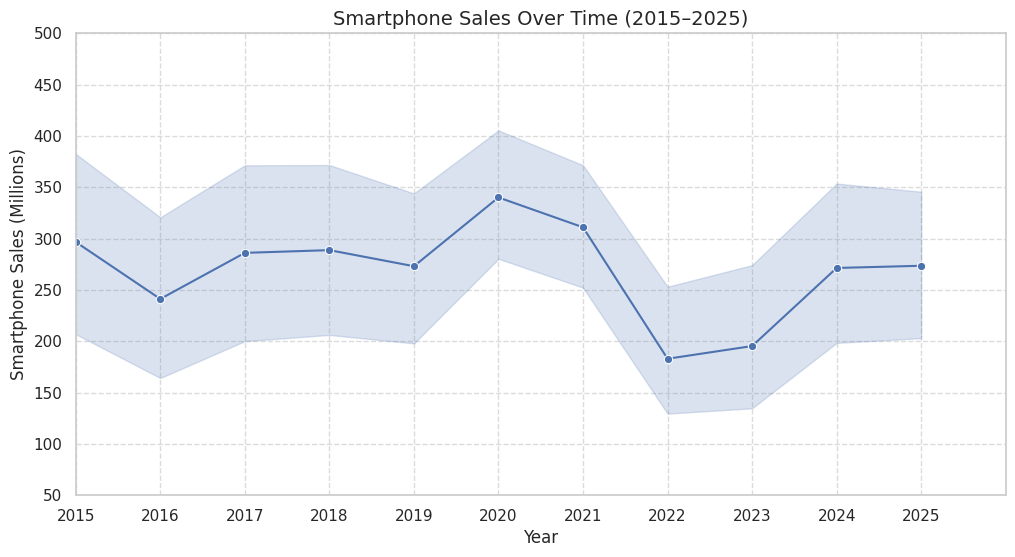

In [118]:
# Sort DataFrame by Year (to connect lines properly)
# Create plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Year',
    y='Smartphone Sales (Millions)',
    data=df,
    marker='o',
)

# Set x-axis limits to include 2015-2025
plt.xlim(2015, 2026)
plt.ylim(50,500)

# Formatting
plt.title('Smartphone Sales Over Time (2015–2025)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Smartphone Sales (Millions)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(2015, 2026, 1))  # Show every year

plt.show()

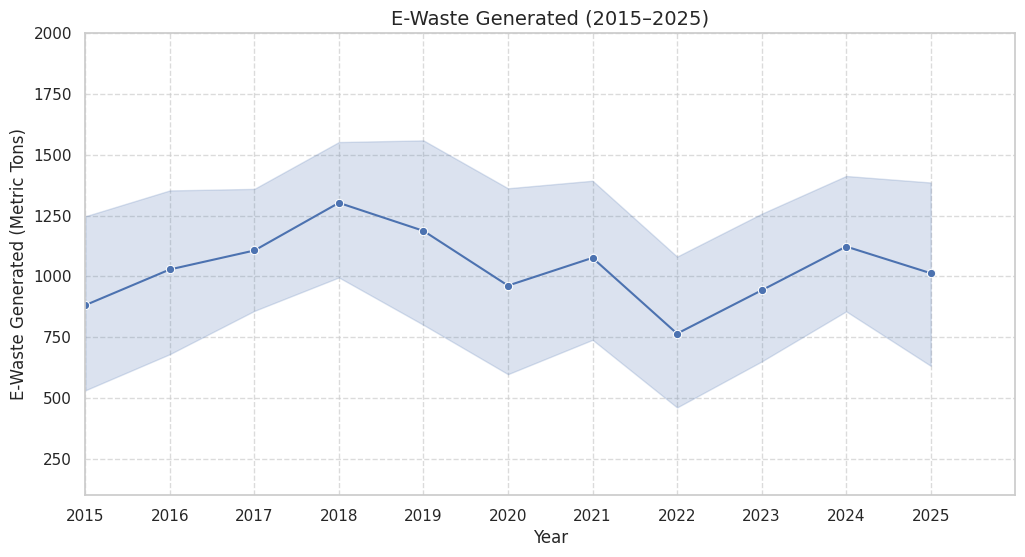

In [119]:
#E-Waste Generated (Metric Tons) year by year
# Sort DataFrame by Year (to connect lines properly)
# Create plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Year',
    y='E-Waste Generated (Metric Tons)',
    data=df,
    marker='o',
)

# Set x-axis limits to include 2015-2025
plt.xlim(2015, 2026)
plt.ylim(100,2000)

# Formatting
plt.title('E-Waste Generated (2015–2025)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('E-Waste Generated (Metric Tons)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(2015, 2026, 1))  # Show every year

plt.show()

<ipython-input-127-85a79a574872>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_2025, x='Country', y='E-Waste Generated (Metric Tons)', palette='viridis')


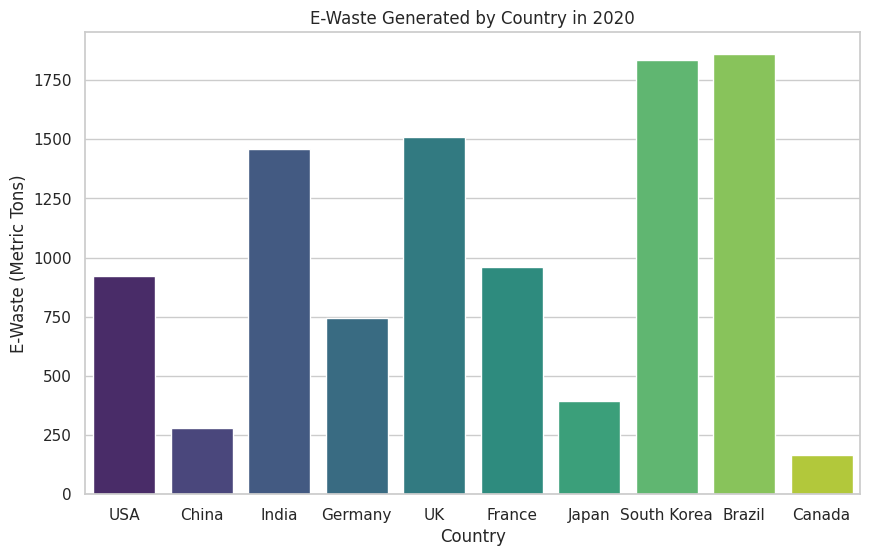

In [127]:
df_2025 = df[df['Year'] == 2025]
plt.figure(figsize=(10, 6))
sns.barplot(data=df_2025, x='Country', y='E-Waste Generated (Metric Tons)', palette='viridis')
plt.title("E-Waste Generated by Country in 2020")
plt.ylabel("E-Waste (Metric Tons)")
plt.show()

([<matplotlib.axis.XTick at 0x797a0b172310>,
 [Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024'),
  Text(2025, 0, '2025')])

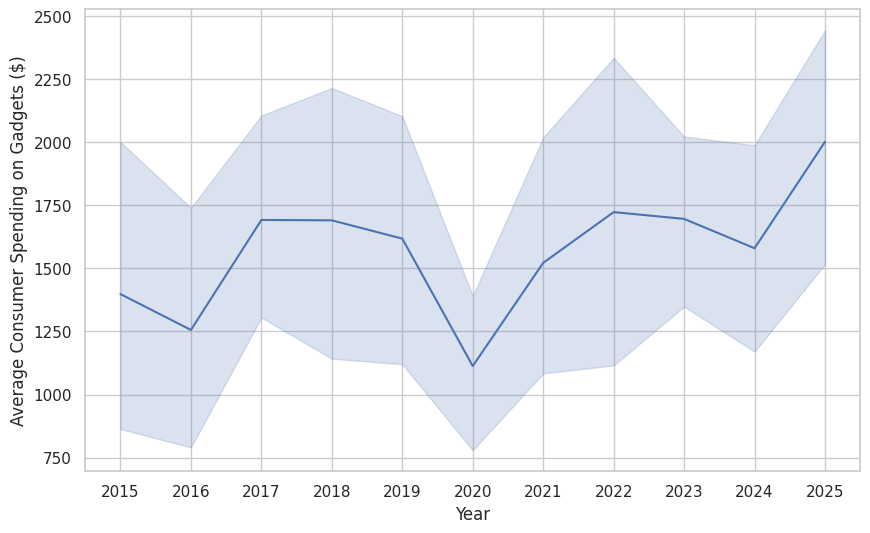

In [136]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df,x='Year',y='Average Consumer Spending on Gadgets ($)')
plt.xlim=(2015,2026)
plt.ylim=(50,3000)
plt.xticks(range(2015, 2026, 1))

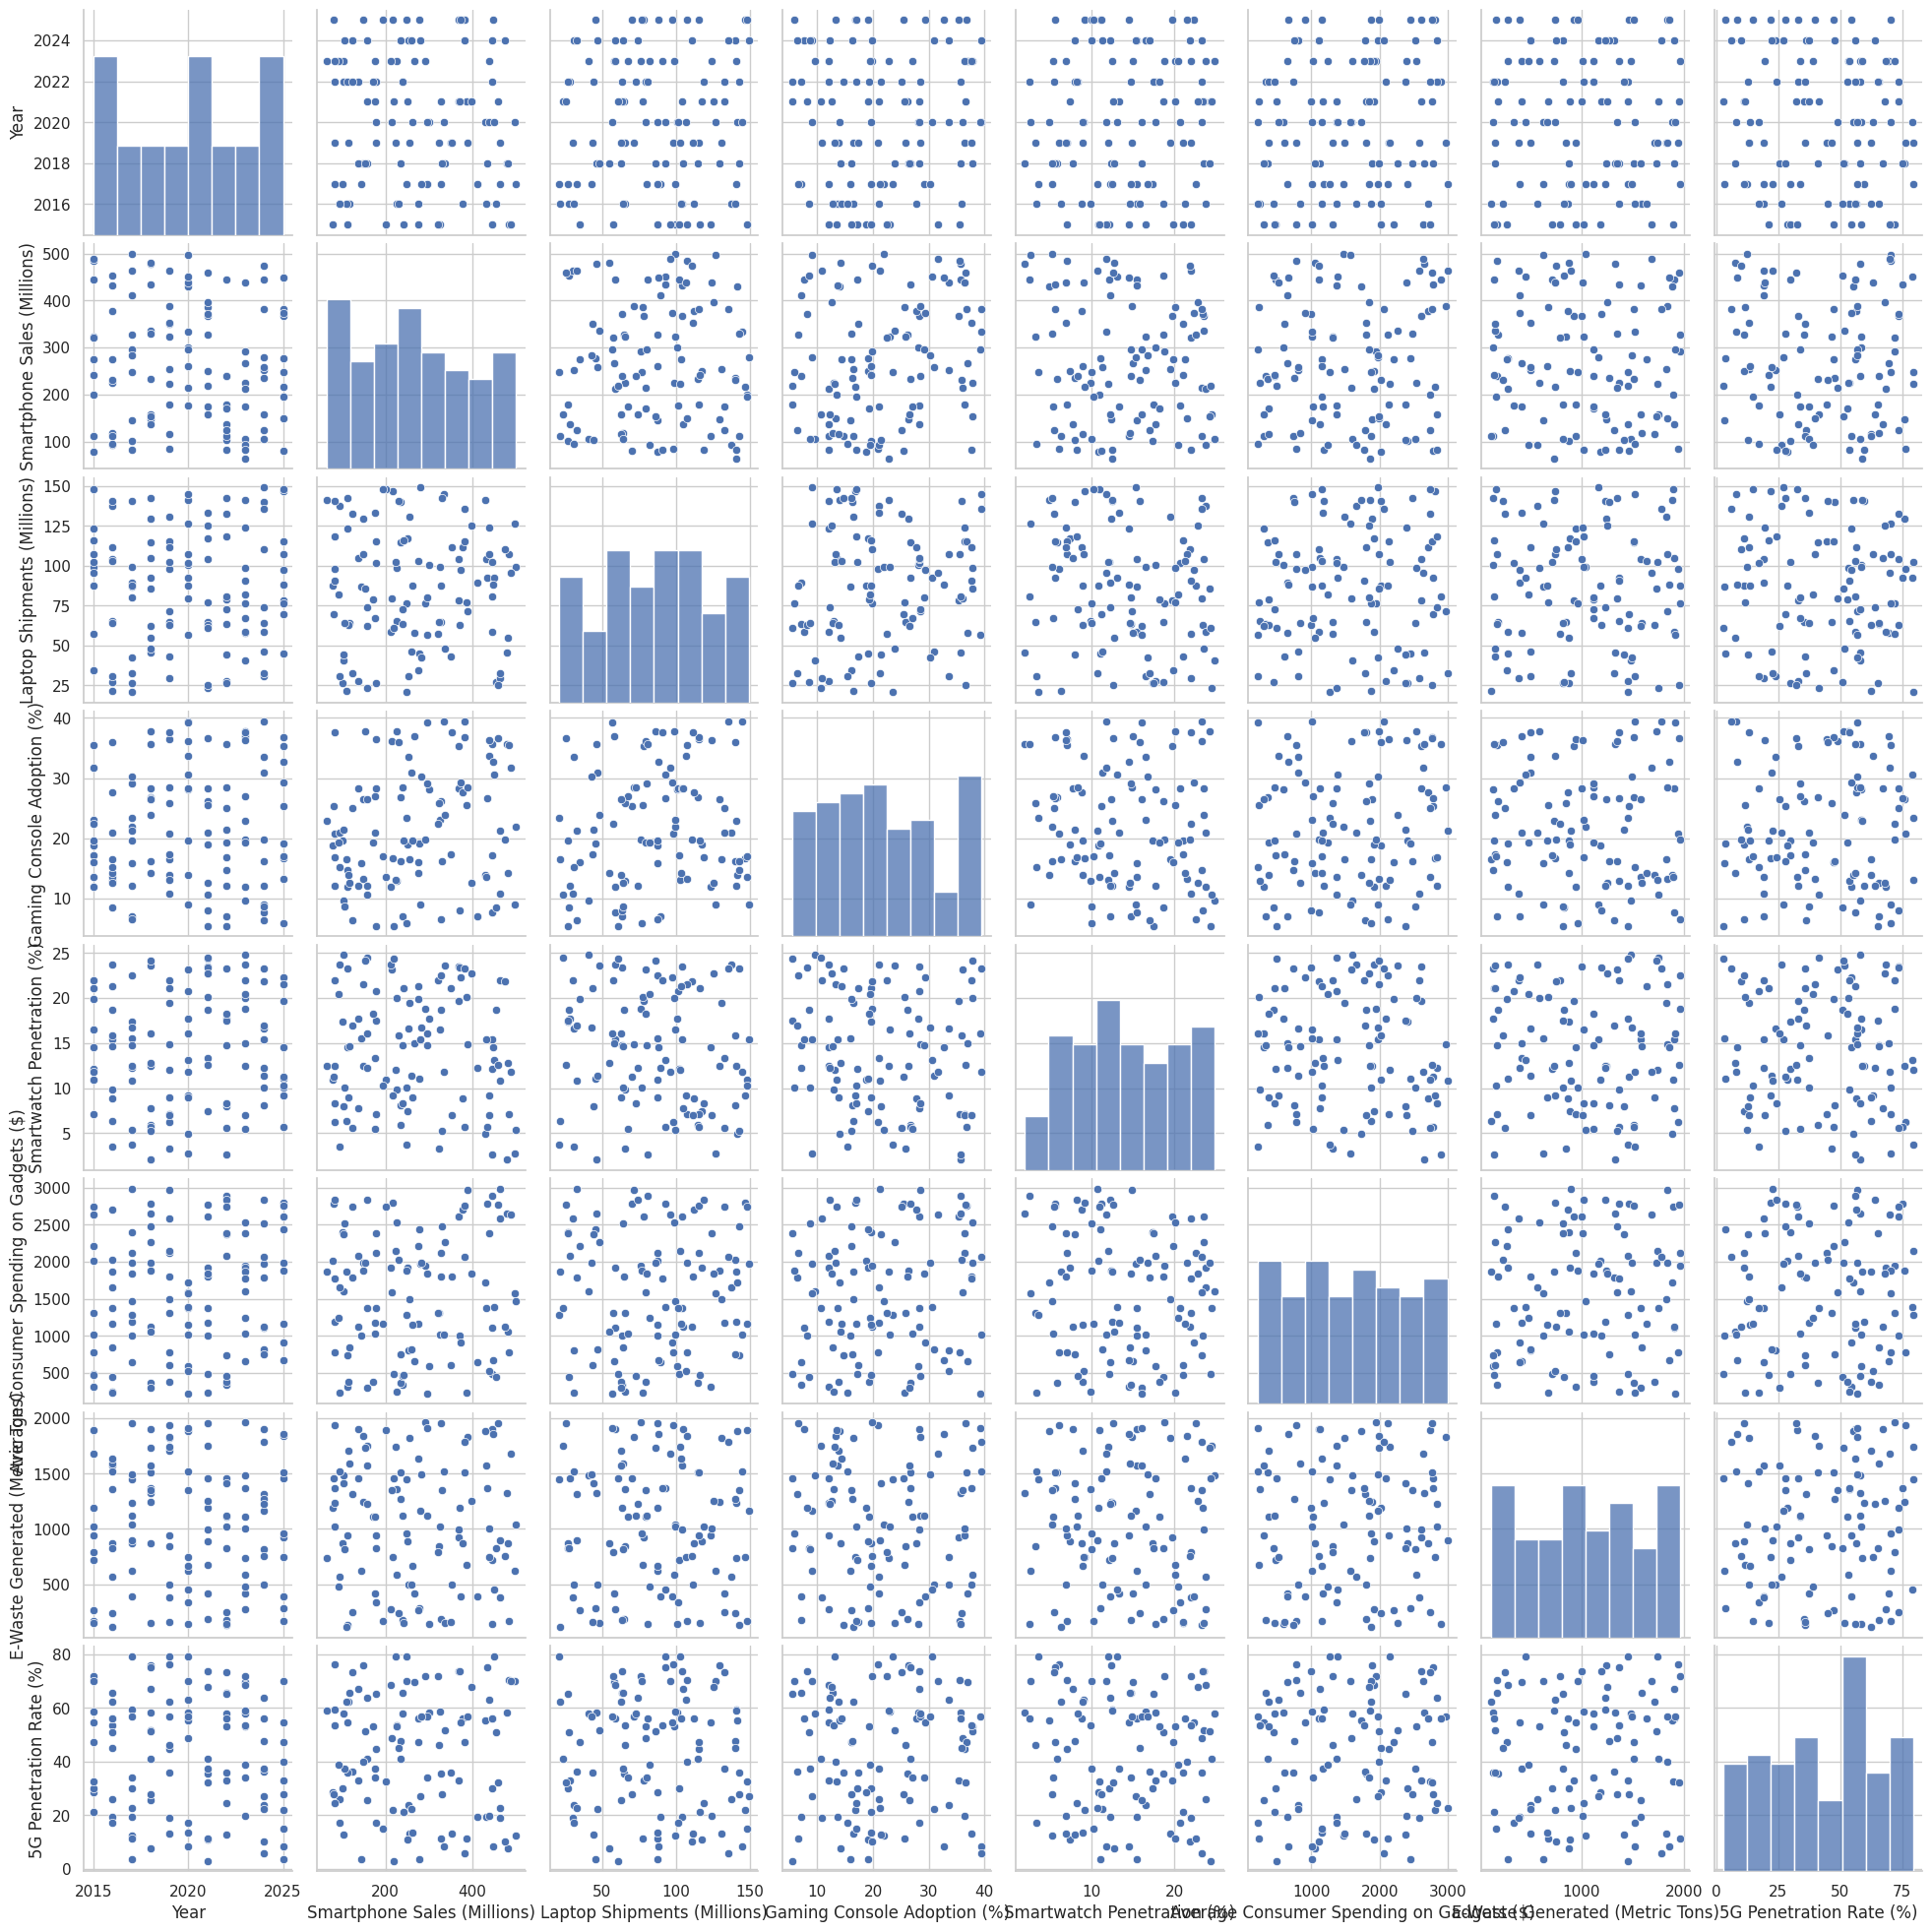

In [140]:
sns.pairplot(data=df)

In [141]:
#model making

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [143]:
df_copy.columns

Index(['Year', 'Smartphone Sales (Millions)', 'Laptop Shipments (Millions)',
       'Gaming Console Adoption (%)', 'Smartwatch Penetration (%)',
       'Average Consumer Spending on Gadgets ($)',
       'E-Waste Generated (Metric Tons)', '5G Penetration Rate (%)',
       'Country_Canada', 'Country_China', 'Country_France', 'Country_Germany',
       'Country_India', 'Country_Japan', 'Country_South Korea', 'Country_UK',
       'Country_USA'],
      dtype='object')

In [144]:
targets = [
    'Average Consumer Spending on Gadgets ($)',
    'E-Waste Generated (Metric Tons)',
    '5G Penetration Rate (%)'
]

# Drop irrelevant columns (if any)
features = [col for col in df.columns if col not in targets and col != 'Country']

# Step 2: Train-Test Split (Traain on 2015–2024, Test on 2025)
train = df[df['Year'] < 2025]
test = df[df['Year'] == 2025]

In [147]:
X_train = train[features]
y_train = train[targets]
X_test = test[features]
y_test = test[targets]

In [148]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)